# Alliance Auth Community apps

Graphs and analytics about the community apps for Alliance Auth.

In [24]:
import pandas as pd
import datetime as dt

In [25]:
"""Load data from source."""

df = pd.read_csv(
    "allianceauth_apps.csv", 
    index_col="id", 
    parse_dates=["created_on", "updated_on", "first_published", "last_published"]
)
# patching author names
df.loc[df["author"] == "ak", "author"] = "Aaron Kable"
df.loc[df["author"] == "AaronKable", "author"] = "Aaron Kable"
df.loc[df["author"] == "Joel Falknau", "author"] = "Ariel Rin"

In [26]:
"""Functions"""

def generate_pie_chart(df, *, key, title, threshold=1):
    total_by_key = df.groupby(key)[key].count()
    totals_mains = total_by_key[total_by_key >= threshold]
    totals_others = total_by_key[total_by_key < threshold]
    if totals_others.sum() > 0:
        totals_all = pd.concat([totals_mains, pd.Series({"other": totals_others.sum()})])
    else:
        totals_all = totals_mains
    plot = totals_all.plot(
        kind="pie",
        autopct=lambda p: "{:.0f}".format((p / 100) * totals_all.sum()),
        figsize=(8.3, 11.7),
        title=title,
        ylabel="",
    )
    fig = plot.get_figure()
    fig.patch.set_facecolor("white")


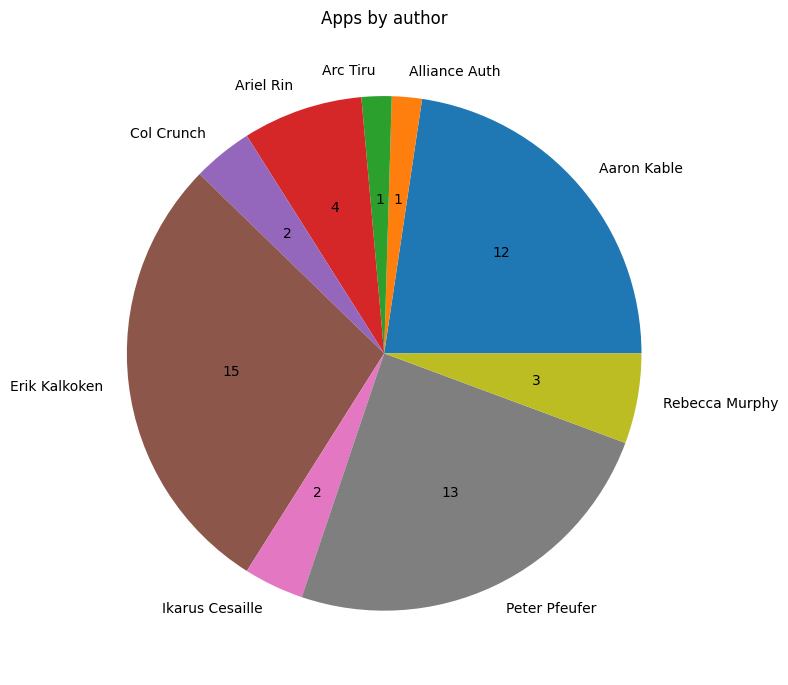

In [27]:
generate_pie_chart(df, key="author", title="Apps by author")

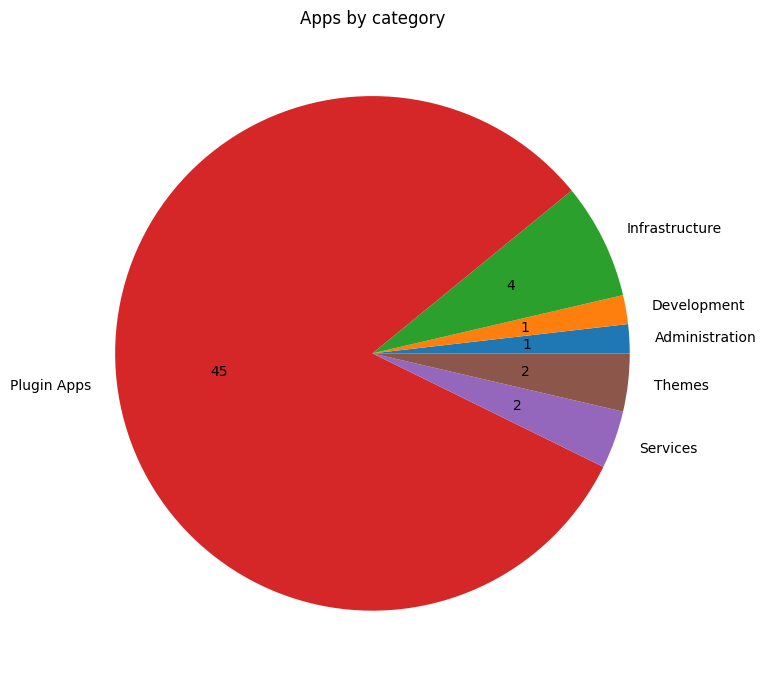

In [28]:
generate_pie_chart(df, key="category", title="Apps by category")

<AxesSubplot: title={'center': 'New released per year'}, xlabel='year', ylabel='count'>

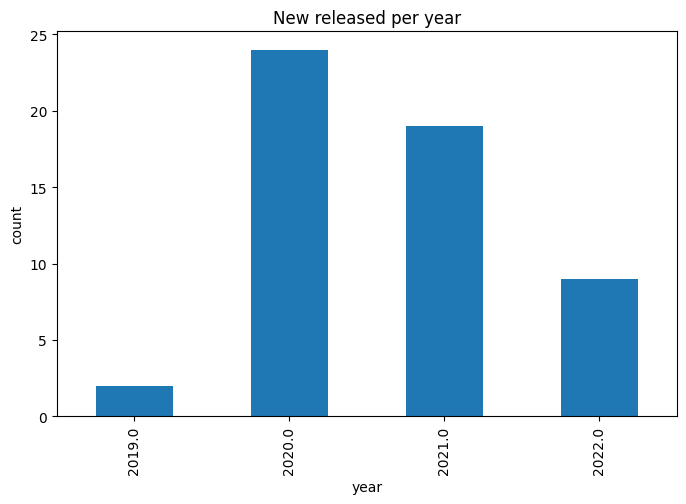

In [29]:
"""Generate chart for the release frequency."""
released_at = pd.to_datetime(df["first_published"]).sort_values(ascending=True)
releases = released_at.to_frame(name="released at")
releases["year"] = releases["released at"].dt.year
releases_per_year = releases.groupby("year")["released at"].count().rename("count")
releases_per_year.plot.bar(
    y="count", ylabel="count", figsize=(8, 5), title="New released per year"
)

In [30]:
"""New releases in 2022"""
df2 = df[(df['first_published'] > pd.Timestamp("2022-01-01", tz="utc")) & (df["category"] == "Plugin Apps")]
df2.loc[:, ['name','summary','version','first_published', 'author']]

name                                            summary  \
id                                                                             
30             Mail Relay           An app for relaying Eve mails to Discord   
49       AllianceAuth PvE                          PvE tool for AllianceAuth   
50   AllianceAuth GraphQL               GraphQL integration for AllianceAuth   
52          aa-statistics                               Alliance Auth Plugin   
56  Discord Announcements  Discord Announcements via Alliance Auth. Write...   
58           Task Monitor   Alliance Auth plugin for monitoring celery tasks   
60           Mining Taxes  An Alliance Auth app that tracks and applies t...   

   version           first_published         author  
id                                                   
30   1.0.4 2022-01-02 20:51:54+00:00  Erik Kalkoken  
49   1.8.0 2022-04-06 20:43:08+00:00            NaN  
50  0.17.2 2022-03-27 09:54:06+00:00            NaN  
52   0.2.1 2022-03-10 09:56:32+00:00    Aaron Kable  
56   0.0.2 2022-08-08 11:16:59+00:00  Peter Pfeufer  
58   0.8.1 2022-08-27 15:39:31+00:00  Erik Kalkoken  
60  1.1.11 2022-11-23 22:54:05+00:00       Arc Tiru